<a href="https://colab.research.google.com/github/vlad-danaila/machine-learning-workout/blob/master/Pytorch_Workout_Deep_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep neural network**

In [194]:
!pip3 install torch

In [0]:
import numpy as np
import torch as t
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.datasets
import torch.nn
import torch.optim

**Create dataset**

In [0]:
x, y = sk.datasets.make_circles(100, noise = 0.3, factor = 0.3)

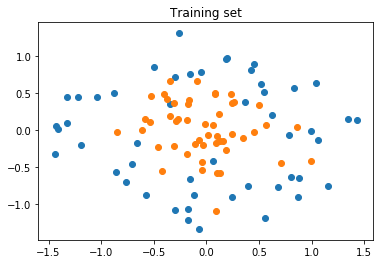

In [197]:
def plot_data():
  plt.scatter(x[y == 0, 0], x[y == 0, 1])
  plt.scatter(x[y == 1, 0], x[y == 1, 1])
  plt.title('Training set')
plot_data()

**Define model**

In [0]:
class DeepNetwork(t.nn.Module):
  
  def __init__(self, layer_sizes):
    super().__init__()
    self.layers = t.nn.ModuleList()
    for i in range(len(layer_sizes) - 1):
      self.layers.append(t.nn.Linear(layer_sizes[i], layer_sizes[i + 1]))
      
  def forward(self, x):
    for layer in self.layers:
      x = t.sigmoid(layer(x))
    return x

**Training**

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:512: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


Text(0, 0.5, 'Loss')

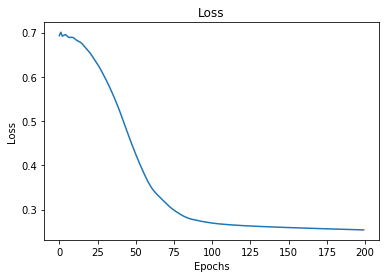

In [199]:
model = DeepNetwork([2, 4, 1])
epochs = 200
losses = []
optimizer = t.optim.Adam(model.parameters(), lr = 0.1)
loss_fn = t.nn.BCELoss()

x_train, y_train = t.Tensor(x), t.Tensor(y)

for i in range(epochs):
  y_pred = model.forward(x_train)
  loss = loss_fn(y_pred, y_train)
  losses.append(loss.item())
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  
plt.plot(range(epochs), losses)
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

**Decision boundry**

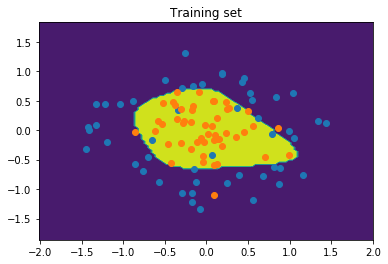

In [200]:
def span(x, steps = 100):
  x_min, x_max = x.min(), x.max()
  diff = x_max - x_min
  padd = diff / 5
  return np.linspace(x_min - padd, x_max + padd, steps)

span_x0, span_x1 = span(x[:, 0]), span(x[:, 1])
mesh_x0, mesh_x1 = np.meshgrid(span_x0, span_x1)
grid = np.c_[mesh_x0.ravel(), mesh_x1.ravel()]
grid_y = model.forward(t.Tensor(grid)).view(mesh_x0.shape) 
grid_y = grid_y > 0.5

plt.contourf(span_x0, span_x1, grid_y)
plot_data()